# Problem Set 5: Using Pandas
Follow the instructions below.

### Importing the package

In [9]:
#Import pandas
import pandas as pd

### 1. Loading and exploring the data
► Q1.1 Import the `EleTaiOneWeek.csv` file (located in the data folder) into a pandas dataframe.
  * Modify the code below so that the `CalcID` field is imported as a string 
  * Note how `parse_dates` imports the `StartDate`,`EndDate`, and `Fixtime` fields as date fields

In [10]:
#Load the data as instructed
df = pd.read_csv('../data/EleTaiOneWeek.csv',
                 parse_dates=['StartDate','EndDate','Fixtime']
                )

---
► Q1.2 Display the first 5 records in the dataframe

In [11]:
#Display the "head" (i.e. the first 5 records) of the dataframe
df.head()

,MovDataID,CalcID,StartDate,EndDate,Fixtime,X,Y,Z
0,Cami,587,2017-04-09 07:33:40,2017-04-15 16:31:42,2017-04-09 08:14:57,-7.626650,6.242050,NaN
1,Cami,587,2017-04-09 07:33:40,2017-04-15 16:31:42,2017-04-09 10:13:55,-7.628533,6.239200,NaN
2,Cami,587,2017-04-09 07:33:40,2017-04-15 16:31:42,2017-04-09 11:14:33,-7.628367,6.238933,NaN
3,Cami,587,2017-04-09 07:33:40,2017-04-15 16:31:42,2017-04-09 12:14:07,-7.629200,6.237500,NaN
4,Cami,587,2017-04-09 07:33:40,2017-04-15 16:31:42,2017-04-09 13:13:56,-7.629800,6.238400,NaN


---
► Q1.3 Display the data types of each column

In [5]:
#Display the data types of each column
df.dtypes

MovDataID            object
CalcID                int64
StartDate    datetime64[ns]
EndDate      datetime64[ns]
Fixtime      datetime64[ns]
X                   float64
Y                   float64
Z                   float64
dtype: object

---
► Q1.4 List each unique value in the `MovDataID` column

In [15]:
#List each unique value in the MovDataID column
df['MovDataID'].unique()

array(['Cami', 'George', 'Frank', 'Yves', 'Tapa', 'Claudine', 'DjeDje',
       'Mahmahdou', 'Blanche', 'Sylvie', 'Zamba', 'Laura', 'Omar', 'Dave',
       'Anika', 'Marie'], dtype=object)

---
► Q1.5 How many unique dates are in the `Fixtime` field?

In [16]:
#Display the number of values in the `Fixtime` column
df['Fixtime'].nunique()

1644

---
### 2. Subsetting data

► Q2.1 Extract values in the `X` column into a variable called `xCoords`

In [20]:
#Extract the X values into a series called xCoords
xCoords = df['X']
xCoords

0      -7.626650
1      -7.628533
2      -7.628367
3      -7.629200
4      -7.629800
          ...   
2002   -7.866850
2003   -7.866783
2004   -7.861517
2005   -7.855983
2006   -7.860733
Name: X, Length: 2007, dtype: float64

---
► Q2.2 Display the last 10 values in the `Xcoords` series

In [22]:
#Display the last 10 values in the series
xCoords.tail(10)

1997   -7.881133
1998   -7.877033
1999   -7.873417
2000   -7.869183
2001   -7.867383
2002   -7.866850
2003   -7.866783
2004   -7.861517
2005   -7.855983
2006   -7.860733
Name: X, dtype: float64

---
► Q2.3 Create a dataframe of just the `X` and `Y` columns and show the head (first 5 rows) of the dataframe

In [23]:
#Create a dataframe of just the X and Y columns and show the first 5 rows of data
dfXY = df[['X', 'Y']]
dfXY.head()

,X,Y
0,-7.626650,6.242050
1,-7.628533,6.239200
2,-7.628367,6.238933
3,-7.629200,6.237500
4,-7.629800,6.238400


---
► Q2.4 Create a Boolean mask (`dfGeorgeMask`) for all records where `MovDataID` is "George"

In [24]:
#Create Boolean mask where MovDataID has the value "George"
mask_George = df['MovDataID'] == 'George'

---
► Q2.5 Select all records where the MovDataID equals "George" into a dataframe called `dfGeorge`
 * *Feel free to use the Boolean mask above or use other techniques.*

In [25]:
#Create a new dataframe of just records where MovDataID is "George"
dfGeorge = df.loc[mask_George]
dfGeorge.head()

,MovDataID,CalcID,StartDate,EndDate,Fixtime,X,Y,Z
139,George,588,2017-04-09 07:33:40,2017-04-15 16:31:42,2017-04-09 08:12:27,-7.622767,6.205850,NaN
140,George,588,2017-04-09 07:33:40,2017-04-15 16:31:42,2017-04-09 10:12:33,-7.622517,6.204767,NaN
141,George,588,2017-04-09 07:33:40,2017-04-15 16:31:42,2017-04-09 11:14:27,-7.622500,6.205317,NaN
142,George,588,2017-04-09 07:33:40,2017-04-15 16:31:42,2017-04-09 12:12:51,-7.623750,6.207250,NaN
143,George,588,2017-04-09 07:33:40,2017-04-15 16:31:42,2017-04-09 14:12:02,-7.626583,6.208233,NaN


---
### 3. Answering questions with the data
► Q3.1 If the 'Y' column represents latitude, what's the southern most location George has been seen?

In [27]:
#Display the southern most location of the "George" subset
dfGeorge['Y'].min()

6.2032

---
► Q3.2 Somehow demonstrate that George been seen north of 6.23°N **28** times.

In [37]:
North = dfGeorge.query('Y > 6.23')
len(North)

28

---
► Q3.3 How many times has George been seen north of 6.23°N *and* west of -7.62°W?

In [43]:
North_and_West = dfGeorge.query('Y > 6.23 & X < -7.62')
len(North_and_West)

18

► Q3.4 What's the *earliest* "Fixtime" date George has been seen 6.23°N and west of -7.62°W?

In [44]:
North_and_West['Fixtime'].min()

Timestamp('2017-04-10 04:12:32')

## A cool plot! 
If we set the index of our table to a time column, then plot the XY coordinates, we can visualize the track of our elephant...

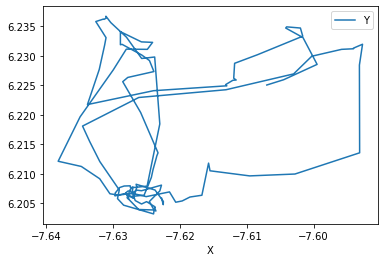

In [45]:
#Plot the path of George!
dfGeorge.set_index('Fixtime').plot(x='X',y='Y');

See if you can to it with another elephant. You'll have to subset the table for a different individual, then repeat the steps above...

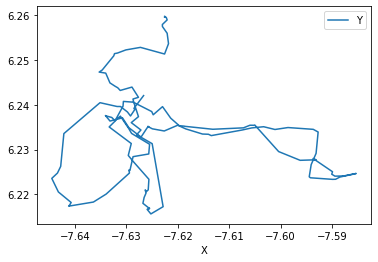

In [46]:
#Plot the path of Cami
mask_Cami = df['MovDataID'] == 'Cami'
#Create a new dataframe of just records where MovDataID is "Cami"
dfCami = df.loc[mask_Cami]
dfCami.set_index('Fixtime').plot(x='X',y='Y');

---
### 4. Grouping/aggregating data
► Q4.1 Group the dataframe of all elephants on the `MovDataID` attribute into a "groupBy" object called `grpName`.

In [50]:
grpName = df.groupby('MovDataID')

<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x00000164C2C1E0A0>>

► Q4.2 List the count of observations for each elephant

In [53]:
grpName['MovDataID'].count()

MovDataID
Anika         35
Blanche      146
Cami         139
Claudine     134
Dave         138
DjeDje       138
Frank        134
George       132
Laura        143
Mahmahdou    132
Marie         34
Omar         144
Sylvie       144
Tapa         134
Yves         134
Zamba        146
Name: MovDataID, dtype: int64

### Demonstrations: Transforming/pivoting data

In [ ]:
#Add an "hour" column to the data 
df['Hour'] = df['Fixtime'].dt.hour

Pivot the data such that: 
* Each each unique`MovDataID` value becomes a row
* Each unique `Hour` value becomes a column
* The table shows median X values for each combination of elephant (MovDataID) in each hour

In [ ]:
#Pivot data
df.pivot_table(index='MovDataID',
               columns='Hour',
               values=['X'],
               aggfunc='median'
              )